# import   packages

In [1]:
import glob
import os
import librosa as lib
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import librosa.display
import numpy as np
import IPython.display as ipd
import shutil
import soundfile
from tqdm import tqdm
from sklearn.model_selection import StratifiedShuffleSplit
import shutil
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# import   packages

In [3]:

def get_files(path):
    files = [file for file in glob.glob(path)]
    return files
def create_dataset(dataset,folder):
    data1 = {"file_path":[],"label":[]}
    unlabelled_files = ["Aunlabelledtest", "Bunlabelledtest"]
    files = get_files(folder + "//**")
    for file in files:
        label = os.path.basename(file).split("_")[0]
        if ((librosa.get_duration(filename=file)>=3) and (label not in unlabelled_files)):
            data1["file_path"].append(file)
            data1["label"].append(label)

    dataset = pd.DataFrame(data1)
    return dataset

In [4]:

data_audio = create_dataset("/set_a","/content/drive/MyDrive/English Accent/set_a")
data_audio

<ipython-input-3-2ed4ef0e4e4e>:10: FutureWarning: get_duration() keyword argument 'filename' has been renamed to 'path' in version 0.10.0.
	This alias will be removed in version 1.0.
  if ((librosa.get_duration(filename=file)>=3) and (label not in unlabelled_files)):


,file_path,label
0,/content/drive/MyDrive/English Accent/set_a/Am...,America
1,/content/drive/MyDrive/English Accent/set_a/In...,Indian
2,/content/drive/MyDrive/English Accent/set_a/Am...,America
3,/content/drive/MyDrive/English Accent/set_a/In...,Indian
4,/content/drive/MyDrive/English Accent/set_a/Am...,America
5,/content/drive/MyDrive/English Accent/set_a/In...,Indian
6,/content/drive/MyDrive/English Accent/set_a/Am...,America
7,/content/drive/MyDrive/English Accent/set_a/Am...,America
8,/content/drive/MyDrive/English Accent/set_a/In...,Indian
9,/content/drive/MyDrive/English Accent/set_a/In...,Indian


In [5]:

data_audio.label.value_counts()

label
Indian     11
America     9
Name: count, dtype: int64

# Visualization of data

In [6]:

def data_distribution(data):
    plt.figure(figsize=(16,3))
    data.label.value_counts().plot(kind='pie', title="audio Data Category")
    plt.show()
def waveform(file_path,label):
    y, sr = lib.load(file_path)
    plt.figure(figsize=(16,3))
    plt.title(label + " Sound Wave")
    lib.display.waveshow(y)

def spectrogram(file_path,label):
    y, sr = lib.load(file_path)
    plt.figure(figsize=(16,3))
    plt.title(label + "  Spectrogram")
    data = lib.amplitude_to_db(np.abs(lib.stft(y)), ref=np.max)
    lib.display.specshow(data, y_axis='log',x_axis='time')
    plt.colorbar();

In [7]:

data_labels =data_audio.label.unique()
data_labels

array(['America', 'Indian'], dtype=object)

/content/drive/MyDrive/English Accent/set_a/America_002.wav


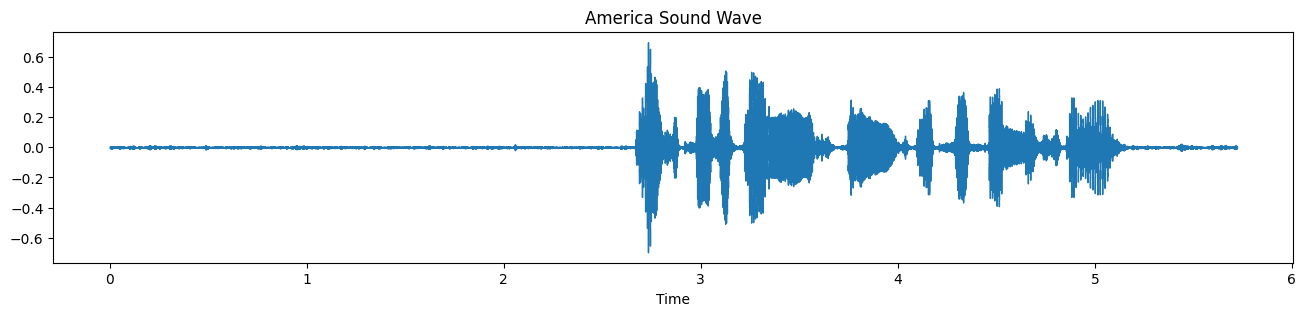

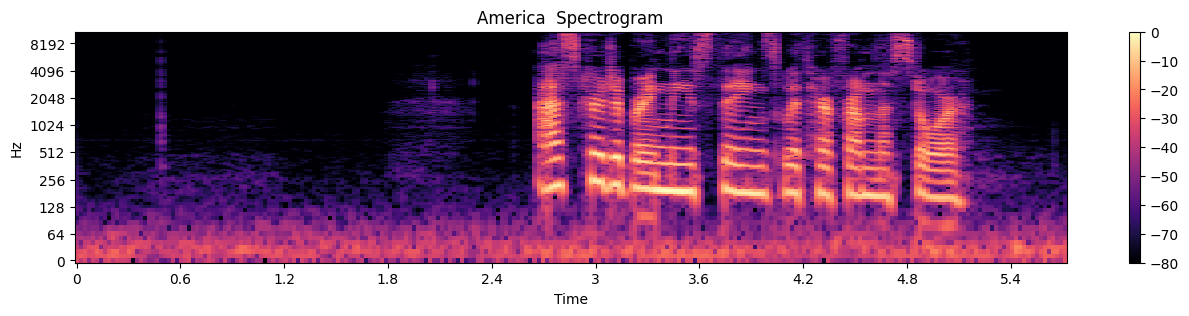

In [8]:
import librosa as lib
import matplotlib.pyplot as plt

path = data_audio[data_audio.label==data_labels[0]].file_path.iloc[3]
print(path)
waveform(path,data_labels[0])
spectrogram(path,data_labels[0])
ipd.Audio(path)

/content/drive/MyDrive/English Accent/set_a/Indian_008.wav


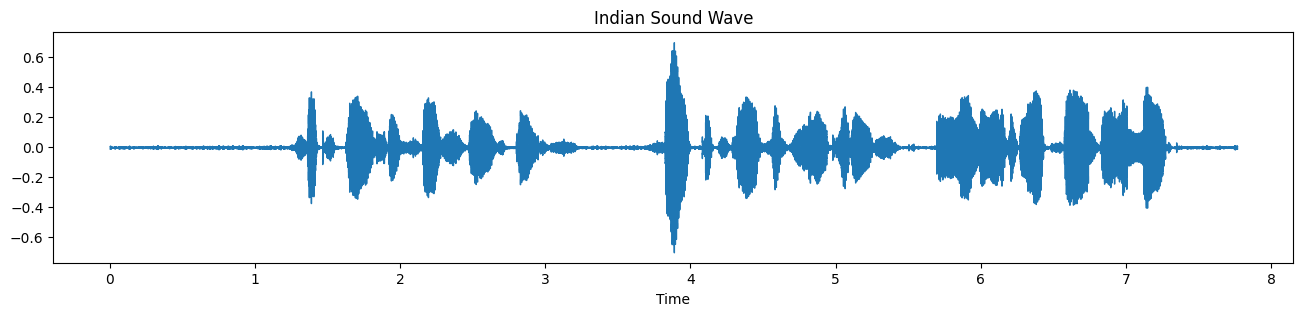

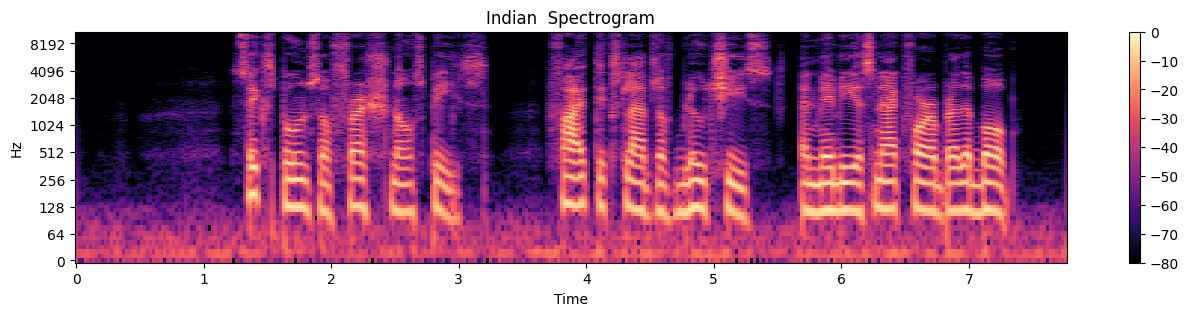

In [9]:

path = data_audio[data_audio.label==data_labels[1]].file_path.iloc[0]
print(path)
waveform(path,data_labels[1])
spectrogram(path,data_labels[1])
ipd.Audio(path)

In [10]:

main_data = create_dataset("/set_a","/content/drive/MyDrive/English Accent/set_a")
main_data

<ipython-input-3-2ed4ef0e4e4e>:10: FutureWarning: get_duration() keyword argument 'filename' has been renamed to 'path' in version 0.10.0.
	This alias will be removed in version 1.0.
  if ((librosa.get_duration(filename=file)>=3) and (label not in unlabelled_files)):


,file_path,label
0,/content/drive/MyDrive/English Accent/set_a/Am...,America
1,/content/drive/MyDrive/English Accent/set_a/In...,Indian
2,/content/drive/MyDrive/English Accent/set_a/Am...,America
3,/content/drive/MyDrive/English Accent/set_a/In...,Indian
4,/content/drive/MyDrive/English Accent/set_a/Am...,America
5,/content/drive/MyDrive/English Accent/set_a/In...,Indian
6,/content/drive/MyDrive/English Accent/set_a/Am...,America
7,/content/drive/MyDrive/English Accent/set_a/Am...,America
8,/content/drive/MyDrive/English Accent/set_a/In...,Indian
9,/content/drive/MyDrive/English Accent/set_a/In...,Indian


In [11]:

main_data.label.value_counts()

label
Indian     11
America     9
Name: count, dtype: int64

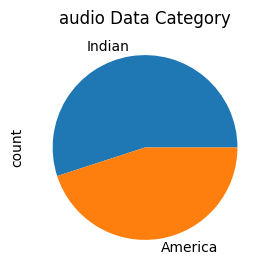

In [12]:

data_distribution(main_data)

# Train and Test split

In [13]:

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_idx, test_idx in split.split(main_data, main_data.label):
    train = main_data.loc[train_idx]
    test = main_data.loc[test_idx]

In [14]:

train

,file_path,label
1,/content/drive/MyDrive/English Accent/set_a/In...,Indian
8,/content/drive/MyDrive/English Accent/set_a/In...,Indian
3,/content/drive/MyDrive/English Accent/set_a/In...,Indian
0,/content/drive/MyDrive/English Accent/set_a/Am...,America
16,/content/drive/MyDrive/English Accent/set_a/In...,Indian
7,/content/drive/MyDrive/English Accent/set_a/Am...,America
11,/content/drive/MyDrive/English Accent/set_a/Am...,America
19,/content/drive/MyDrive/English Accent/set_a/In...,Indian
10,/content/drive/MyDrive/English Accent/set_a/In...,Indian
4,/content/drive/MyDrive/English Accent/set_a/Am...,America


In [15]:

test

,file_path,label
6,/content/drive/MyDrive/English Accent/set_a/Am...,America
5,/content/drive/MyDrive/English Accent/set_a/In...,Indian
13,/content/drive/MyDrive/English Accent/set_a/In...,Indian
12,/content/drive/MyDrive/English Accent/set_a/Am...,America


# MFCC

In [16]:
# MFCC
def feature_extraction(file_path):
    y, sr = lib.load(file_path, duration=3)
    mfcc = lib.feature.mfcc(y=y, sr=sr,n_mfcc=128)
    return mfcc

In [17]:
x_train = np.asarray([feature_extraction(train.file_path.iloc[i]) for i in (range(len(train)))])
x_test = np.asarray([feature_extraction(test.file_path.iloc[i]) for i in (range(len(test)))])

In [18]:

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)

print("X_Train Shape: ", x_train.shape)
print("X_Test Shape: ", x_test.shape)

X_Train Shape:  (16, 128, 130, 1)
X_Test Shape:  (4, 128, 130, 1)


In [19]:
#Encode the labels into numbers from string values
encode = LabelEncoder()
y_train = encode.fit_transform(train.label)
y_test = encode.fit_transform(test.label)

In [20]:
#Setting 5 labels for each audio example with their probabilities
y_train = to_categorical(y_train,num_classes=2)
y_test = to_categorical(y_test,num_classes=2)

print("Y_Train Shape: ", y_train.shape)
print("Y_Test Shape: ", y_test.shape)

Y_Train Shape:  (16, 2)
Y_Test Shape:  (4, 2)


# CNN algorithm

In [21]:
#Creating a CNN model
def CNN_model(n_width,n_height,n_channels,n_dropout,n_classes):
    cnn_model = Sequential()

    cnn_model.add(Conv2D(filters=24, kernel_size=(5,5), strides=(1, 1),input_shape=(n_width,n_height,n_channels), activation ='relu'))
    cnn_model.add(MaxPooling2D((4, 2), strides=(4, 2)))

    cnn_model.add(Conv2D(filters=48, kernel_size=(5,5), padding = 'valid', activation ='relu'))
    cnn_model.add(MaxPooling2D((4, 2), strides=(4, 2)))

    cnn_model.add(Conv2D(filters=48, kernel_size=(5,5), padding = 'valid', activation ='relu'))

    cnn_model.add(Flatten())
    cnn_model.add(Dropout(rate=n_dropout))

    cnn_model.add(Dense(64, activation ='relu'))
    cnn_model.add(Dropout(rate=n_dropout))

    cnn_model.add(Dense(2, activation ='softmax'))

    return cnn_model

In [22]:
model = CNN_model(x_train.shape[1],x_train.shape[2],x_train.shape[3],0.5,len(encode.classes_))

optimizer = Adam(lr=0.0001)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optimizer)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 124, 126, 24)      624       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 63, 24)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 59, 48)        28848     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 29, 48)         0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 2, 25, 48)         57648     
                                                                 
 flatten (Flatten)           (None, 2400)              0

In [23]:
%%time
batch_size = 128
file = 'model_file.hdf5'
path = os.path.join(file)

checkpoints = ModelCheckpoint(filepath=path,save_best_only=True,verbose=1)

CPU times: user 91 µs, sys: 8 µs, total: 99 µs
Wall time: 105 µs


In [24]:


history = model.fit(x_train, y_train, batch_size=batch_size, epochs=100, validation_data=(x_test, y_test),
                        callbacks=[checkpoints],verbose=1)

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 2.4497 - accuracy: 0.7500
Epoch 1: val_loss improved from inf to 1.02980, saving model to model_file.hdf5
1/1 [==============================] - 3s 3s/step - loss: 2.4497 - accuracy: 0.7500 - val_loss: 1.0298 - val_accuracy: 0.5000
Epoch 2/100


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - ETA: 0s - loss: 3.3538 - accuracy: 0.5625
Epoch 2: val_loss did not improve from 1.02980
1/1 [==============================] - 1s 551ms/step - loss: 3.3538 - accuracy: 0.5625 - val_loss: 1.1649 - val_accuracy: 0.5000
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 2.8058 - accuracy: 0.5625
Epoch 3: val_loss improved from 1.02980 to 0.70116, saving model to model_file.hdf5
1/1 [==============================] - 0s 357ms/step - loss: 2.8058 - accuracy: 0.5625 - val_loss: 0.7012 - val_accuracy: 0.2500
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 2.7128 - accuracy: 0.5000
Epoch 4: val_loss did not improve from 0.70116
1/1 [==============================] - 0s 305ms/step - loss: 2.7128 - accuracy: 0.5000 - val_loss: 2.7168 - val_accuracy: 0.5000
Epoch 5/100
1/1 [==============================] - ETA: 0s - loss: 3.7563 - accuracy: 0.5000
Epoch 5: val_loss did not improve from 0.70116
1/1 [=======================

In [25]:
def plot_accuracy_loss(history):

    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--', label = "accuracy")
    plt.plot(history.history['val_accuracy'], 'ro--', label = "val_accuracy")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

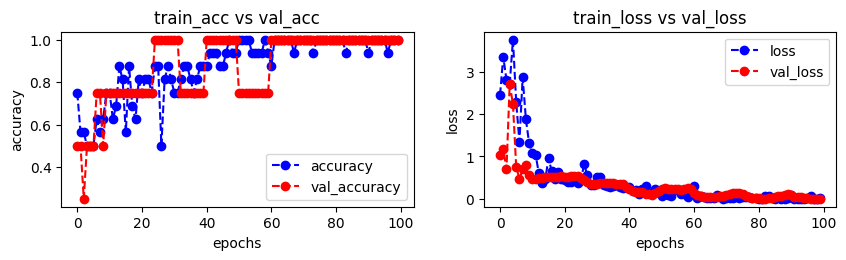

In [26]:
plot_accuracy_loss(history)

In [27]:

training_scores = model.evaluate(x_train, y_train)
print('low Training Loss:', training_scores[0])
print('good Training Accuracy:', training_scores[1])

1/1 [==============================] - 0s 104ms/step - loss: 4.4673e-04 - accuracy: 1.0000
low Training Loss: 0.00044673302909359336
good Training Accuracy: 1.0


In [28]:

testing_scores = model.evaluate(x_test, y_test)
print('low Testing Loss:', testing_scores[0])
print('good  Testing Accuracy:', testing_scores[1])

1/1 [==============================] - 0s 107ms/step - loss: 6.4654e-04 - accuracy: 1.0000
low Testing Loss: 0.0006465350743383169
good  Testing Accuracy: 1.0


In [29]:
preds = model.predict(x_test)
y_actual = []
y_pred = []

labels = encode.classes_
for idx, pred in enumerate(preds):
    y_actual.append(labels[np.argmax(y_test[idx])])
    y_pred.append(labels[np.argmax(pred)])

print(classification_report(y_pred, y_actual))

1/1 [==============================] - 0s 246ms/step
              precision    recall  f1-score   support

     America       1.00      1.00      1.00         2
      Indian       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



In [30]:
test.label.value_counts()

label
America    2
Indian     2
Name: count, dtype: int64